In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
GAS_STATIONS_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Tankstellen.csv')
GAS_PRICE_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Benzinpreise')

In [3]:
gas_stations_df = pd.read_csv(GAS_STATIONS_PATH, sep=';', names=['id', 'Name', 'Company', 'Street', 'House_Number', 'Postalcode', 'City', 'Lat', 'Long'],index_col='id')
gas_stations_df

,Name,Company,Street,House_Number,Postalcode,City,Lat,Long
id,,,,,,,,
1,star Tankstelle,STAR,Listlandstrasse,16,25992,List,55.015890,8.429530
2,Esso Tankstelle,ESSO,TRIFT 2,,25980,WESTERLAND,54.907468,8.308741
3,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700
4,DEXX-Station 188,DEXX,Dorfstr.,19,25927,Aventoft,54.901300,8.822810
5,team Tankautomat Hesbüll,Raiffeisen,Raiffeisenstr.,1,25927,Hesbüll,54.900900,8.810690
6,Aral Tankstelle,ARAL,Keitumer Landstraße,NaN,25980,Sylt-Ost,54.900402,8.339205
7,team Tankautomat Süderlügum,team,Hauptstr.,16,25923,Süderlügum,54.870800,8.906840
8,ELAN Suederluegum,ELAN,HAUPTSTR.,4,25923,SUEDERLUEGUM,54.869200,8.906220
9,OIL! tank & go Automatentankstelle Ladelund,OIL!,Dorfstraße 24,NaN,25926,Ladelund,54.840400,9.027780


In [4]:
def calculate_change_rate(gas_station_row):
    try:
        gas_station = pd.read_csv(os.path.join(GAS_PRICE_PATH,'{}.csv'.format(gas_station_row[0])), names=['Timestamp', 'Price'],  index_col='Timestamp',parse_dates=['Timestamp'],sep=';')
        number_of_entries = len(gas_station["Price"])
        first_entry = gas_station.iloc[[0]]["Price"].index
        last_entry = gas_station.iloc[[-1]]["Price"].index
        number_of_days = (last_entry-first_entry).days[0]
        if number_of_days != 0:
            return number_of_entries/number_of_days
        else:
            return -1
    except FileNotFoundError:
        pass

In [5]:
change_rate = []
for gas_station_row in gas_stations_df.iterrows():
    change_rate_gas_station = calculate_change_rate(gas_station_row)
    if change_rate_gas_station != -1:
        change_rate.append(change_rate_gas_station)

In [30]:
change_rate = [-1 if v is None else v for v in change_rate]

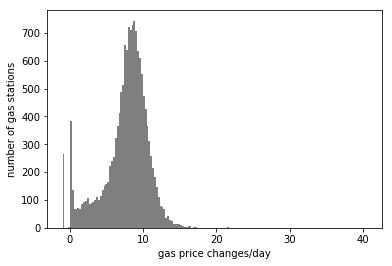

In [19]:
plt.hist(change_rate, bins='auto')
plt.ylabel('number of gas stations')
plt.xlabel('gas price changes/day')
plt.show()

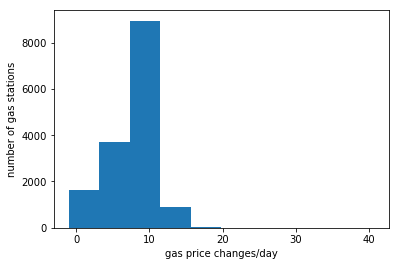

In [20]:
plt.hist(change_rate)
plt.ylabel('number of gas stations')
plt.xlabel('gas price changes/day')
plt.show()

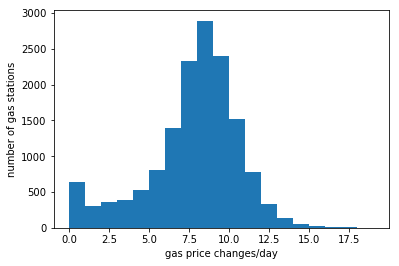

In [21]:
plt.hist(change_rate, bins=[i for i in range(0,20)])
plt.ylabel('number of gas stations')
plt.xlabel('gas price changes/day')
plt.show()

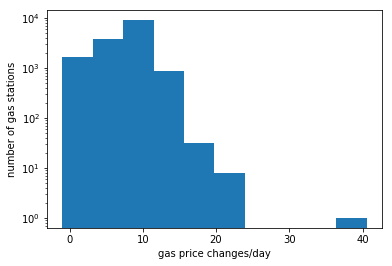

In [22]:
plt.hist(change_rate, log=True)
plt.ylabel('number of gas stations')
plt.xlabel('gas price changes/day')
plt.show()

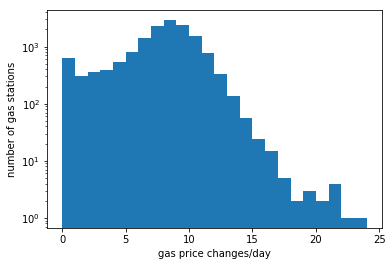

In [23]:
plt.hist(change_rate, log=True, bins=[i for i in range(0,25)])
plt.ylabel('number of gas stations')
plt.xlabel('gas price changes/day')
plt.show()

In [35]:
change_rate = list(filter(lambda a: a != -1, change_rate))

In [36]:
import numpy as np
np.max(change_rate)

40.554628857381154

In [37]:
np.mean(change_rate)

7.7885689141894927

In [38]:
np.std(change_rate)

2.9278009155962308

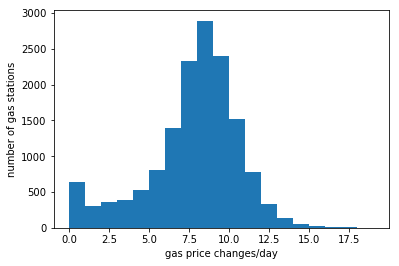

In [43]:
plt.hist(change_rate, bins=[i for i in range(0,20)])
plt.ylabel('number of gas stations')
plt.xlabel('gas price changes/day')
plt.savefig('gas-price-change-rate.png', dpi=700)
plt.show()